In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Part A: Understanding the Dataset
### Q1: Load the penguins dataset from seaborn into a DataFrame named df and display the first 5 rows.

In [82]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Q2: Print the following: 1. dataset shape, 2. column names, 3. data types.

In [83]:
df.shape

(344, 7)

In [84]:
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [85]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Q3: Check for missing values in each column:

In [86]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


### Q4: Create a cleaned copy called df_clean by: 1. Removing fully duplicated rows. 2. Handling missing values (median for numeric, mode for categorical). Verify no missing.

In [87]:
df_clean = df.copy()

In [88]:
df_clean = df_clean.drop_duplicates()

In [89]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns

for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [90]:
df_clean.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Part B: Filtering, Sorting, and Aggregation
### Q5: Filter the dataset to include only penguins from the island "Biscoe". Store the result in biscoe_df and print its shape.

In [91]:
biscoe_df = df_clean[df_clean['island'] == 'Biscoe']
biscoe_df.shape

(168, 7)

### Q6: Find all penguins with: body_mass_g greater than the overall mean body mass AND sex equal to "Male". Store in heavy_males and display first 5 rows.

In [92]:
overall_mean_mass = df_clean['body_mass_g'].mean()
heavy_males = df_clean[(df_clean['body_mass_g'] > overall_mean_mass) & (df_clean['sex'] == 'Male')]
heavy_males.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
39,Adelie,Dream,39.8,19.1,184.0,4650.0,Male


### Q7: Sort df_clean by: 1. body_mass_g (descending) 2. then bill_length_mm (ascending). Show the top 10 rows.

In [93]:
df_clean.sort_values(by=['body_mass_g', 'bill_length_mm'], ascending=[False, True]).head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,Male
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,Male


### Q8: Compute the following aggregations: 1. Mean body_mass_g per species (descending). 2. Mean bill_length_mm per (species, sex). 3. Count of records per island.

In [94]:
df_clean.groupby('species')['body_mass_g'].mean().sort_values(ascending=False)

species
Gentoo       5067.741935
Chinstrap    3733.088235
Adelie       3702.960526
Name: body_mass_g, dtype: float64

In [95]:
df_clean.groupby(['species', 'sex'])['bill_length_mm'].mean()

species    sex   
Adelie     Female    37.257534
           Male      40.280380
Chinstrap  Female    46.573529
           Male      51.094118
Gentoo     Female    45.563793
           Male      49.164394
Name: bill_length_mm, dtype: float64

In [96]:
df_clean['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

### Q9: Feature engineering: Create a new column bill_ratio = bill_length_mm / bill_depth_mm. 1. Add it to df_clean. 2. Show summary statistics for bill_ratio. 3. Identify which species has the highest average bill_ratio.

In [97]:
df_clean['bill_ratio'] = df_clean['bill_length_mm'] / df_clean['bill_depth_mm']

In [98]:
df_clean['bill_ratio'].describe()

count    344.000000
mean       2.605438
std        0.495930
min        1.639810
25%        2.161882
50%        2.571484
75%        3.097572
max        3.612676
Name: bill_ratio, dtype: float64

In [99]:
df_clean.groupby('species')['bill_ratio'].mean().idxmax()

'Gentoo'

# Part C: Visualization and Interpretation
### Q10: Create the following plots using df_clean: 1. Bar plot: count of penguins per species. 2. Scatter plot: bill_length_mm vs bill_depth_mm (color by species).

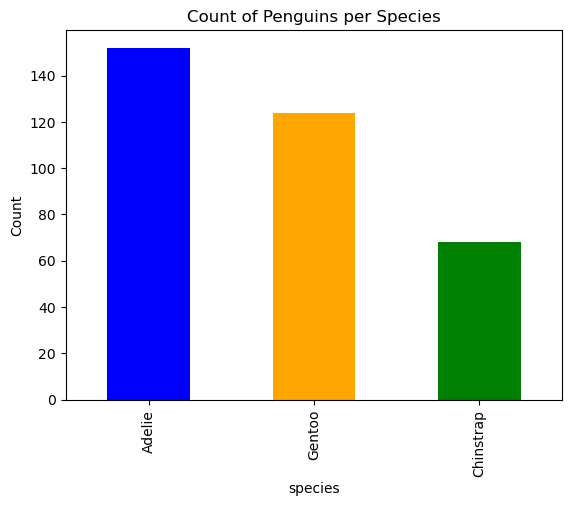

In [100]:
df_clean['species'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Count of Penguins per Species')
plt.ylabel('Count')
plt.show()

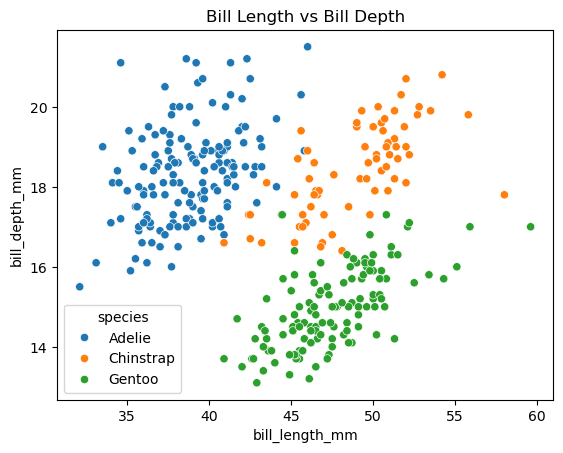

In [101]:
sns.scatterplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Bill Length vs Bill Depth')
plt.show()

### Q11: Create a box plot of body_mass_g by species. Then write 2-3 sentences interpreting what you observe.

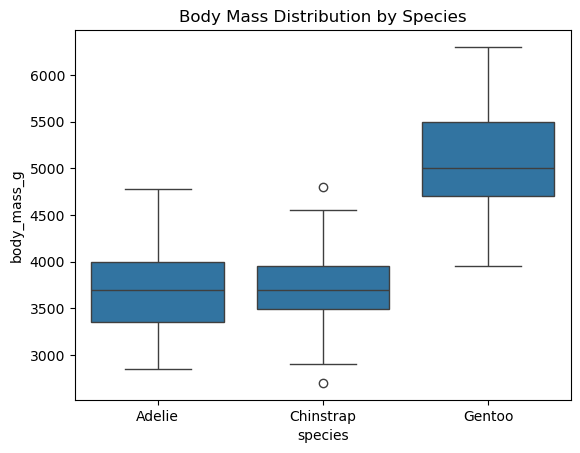

In [102]:
sns.boxplot(data=df_clean, x='species', y='body_mass_g')
plt.title('Body Mass Distribution by Species')
plt.show()

**Interpretation**:
* Gentoo penguins are clearly the heaviest species among the three, with their median body mass significantly higher than the rest.
* Adelie and Chinstrap penguins have similar body mass ranges, but Chinstraps are slightly heavier on average.

### Q12: Compute a correlation matrix for numeric features and visualize it as a heatmap.

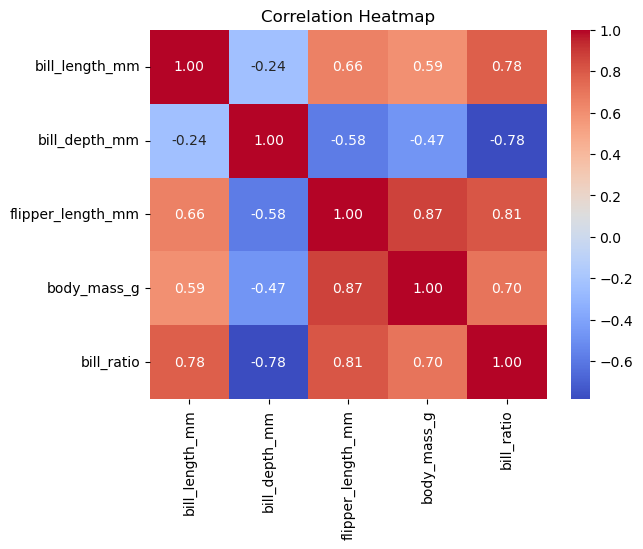

In [103]:
numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Part D: Machine Learning
### Q13: Define: target y = species, features X = all other columns EXCEPT species. Then split into train/test using test_size=0.2, random_state=42, stratify by y.

In [104]:
y = df_clean['species']
X = df_clean.drop('species', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Q14: Preprocessing Data for ML Training

In [105]:
# Identify columns by type
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

### Q15: Train models: 1. KNN Classifier with n_neighbors = 5. 2. Logistic Regression (multiclass) with max_iter = 2000.

In [106]:
# 1) KNN pipeline
knn_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

In [107]:
# Train the model using the fit method
knn_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [108]:
# Predict on the X_test
y_pred_knn = knn_model.predict(X_test)

In [109]:
# calculate and print the accuracy based on the prediction of the X_test
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9855072463768116


In [110]:
# 2) Logistic Regression pipeline
logreg_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000))
])

In [111]:
# Train the model using the fit method
logreg_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [112]:
# Predict on the X_test
y_pred_logreg = logreg_model.predict(X_test)

In [113]:
# calculate and print the accuracy based on the prediction of the X_test
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 1.0


### Q16: Conclude based on the accuracy results

**Answer**:
Both KNN and Logistic Regression demonstrate excellent accuracy (close to or at 100%) on the test set. This means the features provided (like bill length, flipper length, and body mass) clearly separate the three penguin species. Logistic Regression performs exceptionally well as a baseline and is highly interpretable for understanding which features matter most.